## Bank-Customer-Churn-Prediction

### Description:

<pre>
This module demonstrates how to import necessary libraries for classification model evaluation. It includes imports for the following libraries:
- <b>pandas</b>                : Data manipulation library.
- <b>seaborn</b>               : Statistical data visualization library.
- <b>matplotlib.pyplot</b>     : Plotting and charting library.
- <b>warnings</b>              : Module for handling warning messages.
- <b>train_test_split</b>      : Function from scikit-learn for splitting data into train and test sets.
- <b>LazyClassifier</b>        : Class from <b>lazypredict.Supervised</b> for quick model comparison.
- <b>LGBMClassifier</b>        : Classifier from <b>lightgbm</b> for classification using the LightGBM algorithm.
- <b>accuracy_score</b>        : Function from <b>sklearn.metrics</b> for calculating classification accuracy.
- <b>classification_report</b> : Function from <b>sklearn.metrics</b> for generating a classification report.
</pre>



### Usage:
To install the required dependencies, use the following command:
```python
!conda install -c conda-forge pandas seaborn matplotlib scikit-learn lazypredict lightgbm -y


## Table Description

Bank Churn Prediction Table Columns:

<pre>
- <b>CustomerId</b>      : The unique identifier for each customer in the bank.
- <b>Surname</b>         : The last name of the customer.
- <b>CreditScore</b>     : The credit score of the customer, indicating their creditworthiness.
- <b>Geography</b>       : The country or region where the customer resides.
- <b>Gender</b>          : The gender of the customer.
- <b>Age</b>             : The age of the customer.
- <b>Tenure</b>          : The number of years the customer has been with the bank.
- <b>Balance</b>         : The account balance of the customer.
- <b>NumOfProducts</b>   : The number of bank products the customer has.
- <b>HasCrCard</b>       : Indicates whether the customer has a credit card (1 if yes, 0 if no).
- <b>IsActiveMember</b>  : Indicates whether the customer is an active member (1 if yes, 0 if no).
- <b>EstimatedSalary</b> : The estimated salary of the customer.
- <b>Exited</b>          : Indicates whether the customer has churned or not (1 if churned, 0 if retained).
</pre>




In [1]:
import pandas as pd  # Data manipulation library
import seaborn as sns  # Statistical data visualization library
import matplotlib.pyplot as plt  # Plotting and charting library

import warnings  # Module for handling warning messages
warnings.filterwarnings('ignore')  # Ignore warning messages

from sklearn.model_selection import train_test_split  # Function for splitting data into train and test sets
from lazypredict.Supervised import LazyClassifier  # Class for quick model comparison
from lightgbm import LGBMClassifier  # Classifier for classification using the LightGBM algorithm
from sklearn.metrics import accuracy_score, classification_report  # Functions for model evaluation

In [2]:
df = pd.read_csv('D:\Imam\Belajar\Python\Data_Science\Customer Churn\Churn_Modelling.csv', sep = ',')

# Read the CSV file 'Churn_Modelling.csv' and store the data in a DataFrame named 'df'
# The file path is specified as 'D:\Imam\Belajar\Python\Data_Science\Customer Churn\Churn_Modelling.csv'
# The separator in the CSV file is ',' (comma-separated values)

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
# Calculate the number of missing values in each column of the DataFrame 'df'
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# Display a concise summary of the DataFrame 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Remove unnecessary columns from 'df'
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [7]:
Geography = df['Geography'].unique()  # Get the unique values from the 'Geography' column
Gender = df['Gender'].unique()  # Get the unique values from the 'Gender' column

print(f'Unique Geography : {Geography}')  # Print the unique values of the 'Geography' column
print(f'Unique Gender    : {Gender}')  # Print the unique values of the 'Gender' column

Unique Geography : ['France' 'Spain' 'Germany']
Unique Gender    : ['Female' 'Male']


In [8]:
df['Geography'] = df['Geography'].replace(['France', 'Spain', 'Germany'], ['1', '2', '3'])
# Replace the values 'France', 'Spain', and 'Germany' in the 'Geography' column with '1', '2', and '3', respectively

df['Gender'] = df['Gender'].replace(['Female', 'Male'], ['1', '2'])
# Replace the values 'Female' and 'Male' in the 'Gender' column with '1' and '2', respectively

In [9]:
df['Geography'] = df['Geography'].astype('int64')  # Convert 'Geography' column to int64 data type
df['Gender'] = df['Gender'].astype('int64')  # Convert 'Gender' column to int64 data type

In [10]:
df.drop_duplicates(inplace=True)  # Drop duplicate rows from the DataFrame

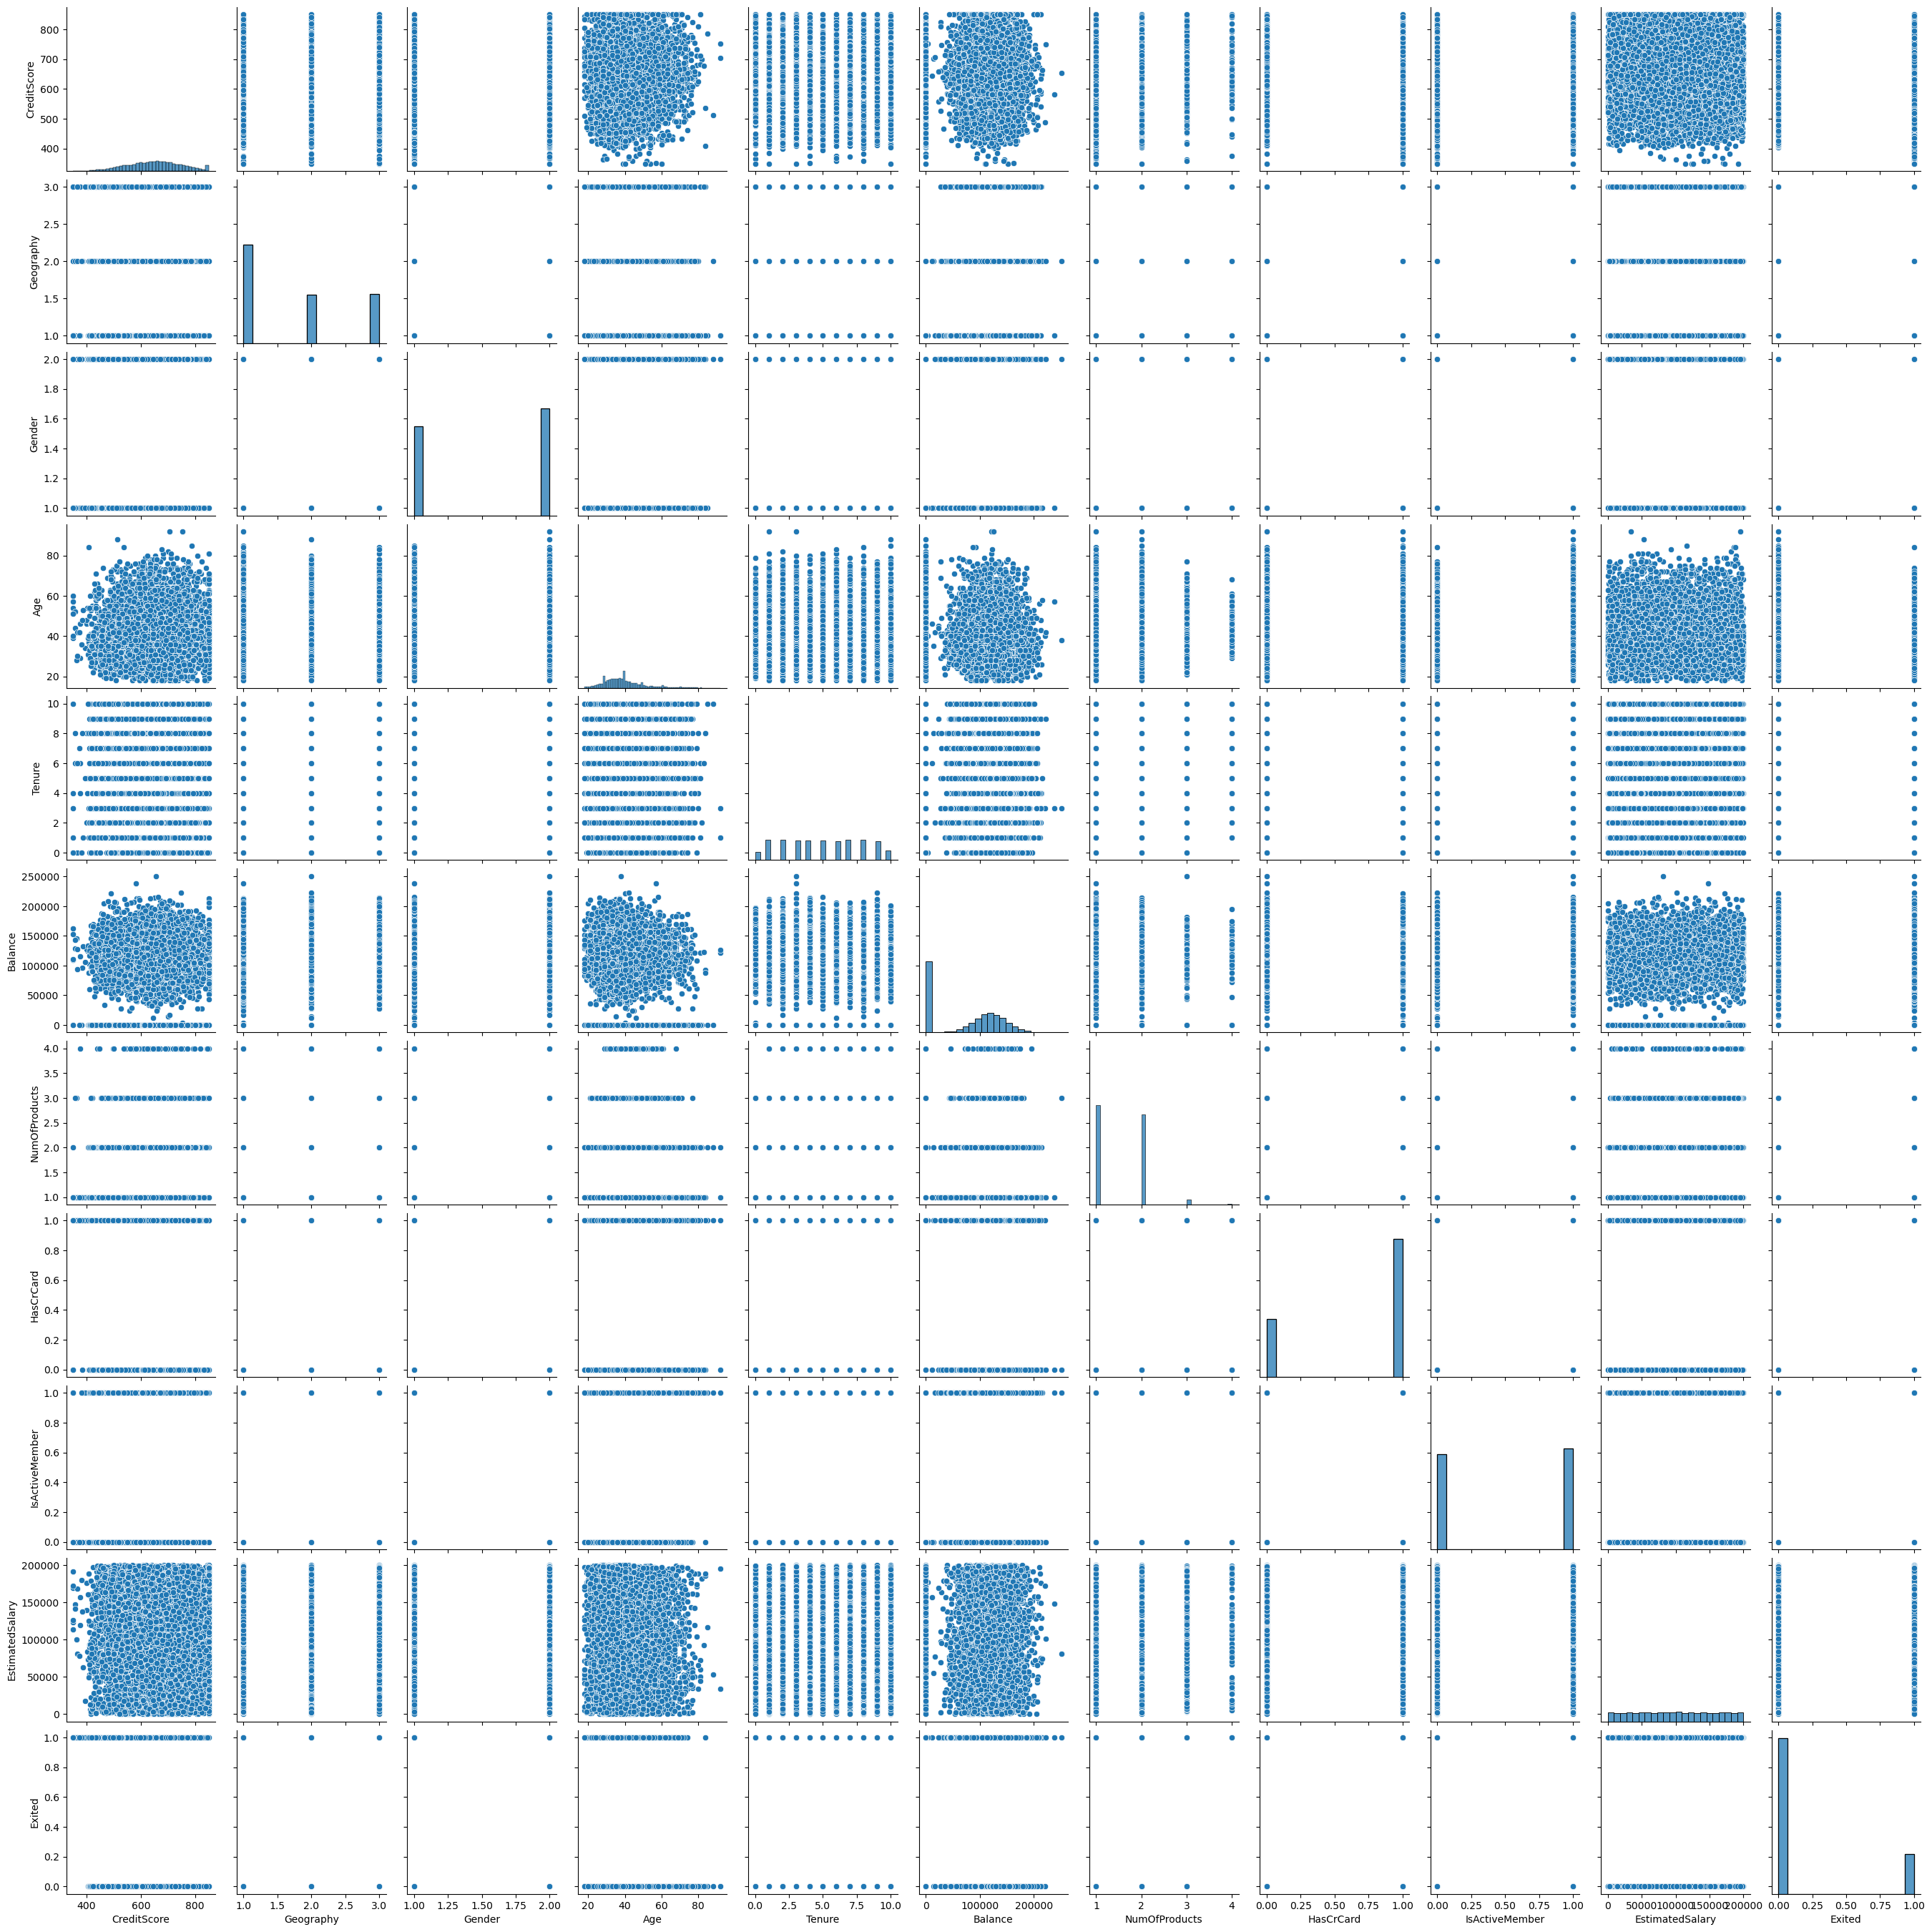

In [11]:
sns.pairplot(df)
plt.show()  # Display the pairplot

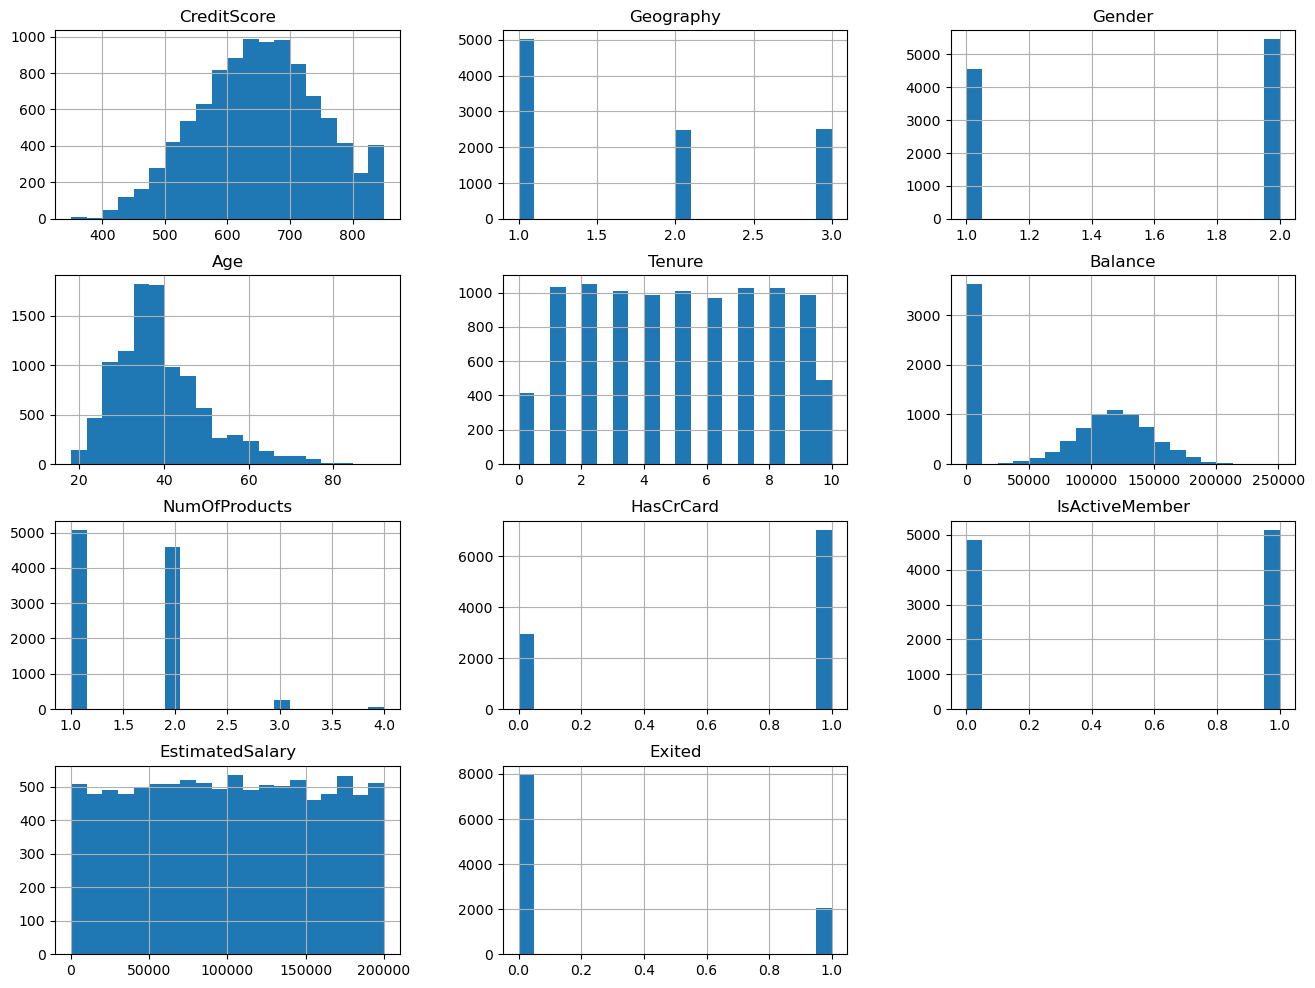

In [12]:
df.hist(bins=20, figsize=(16, 12))
plt.show()  # Display the histogram

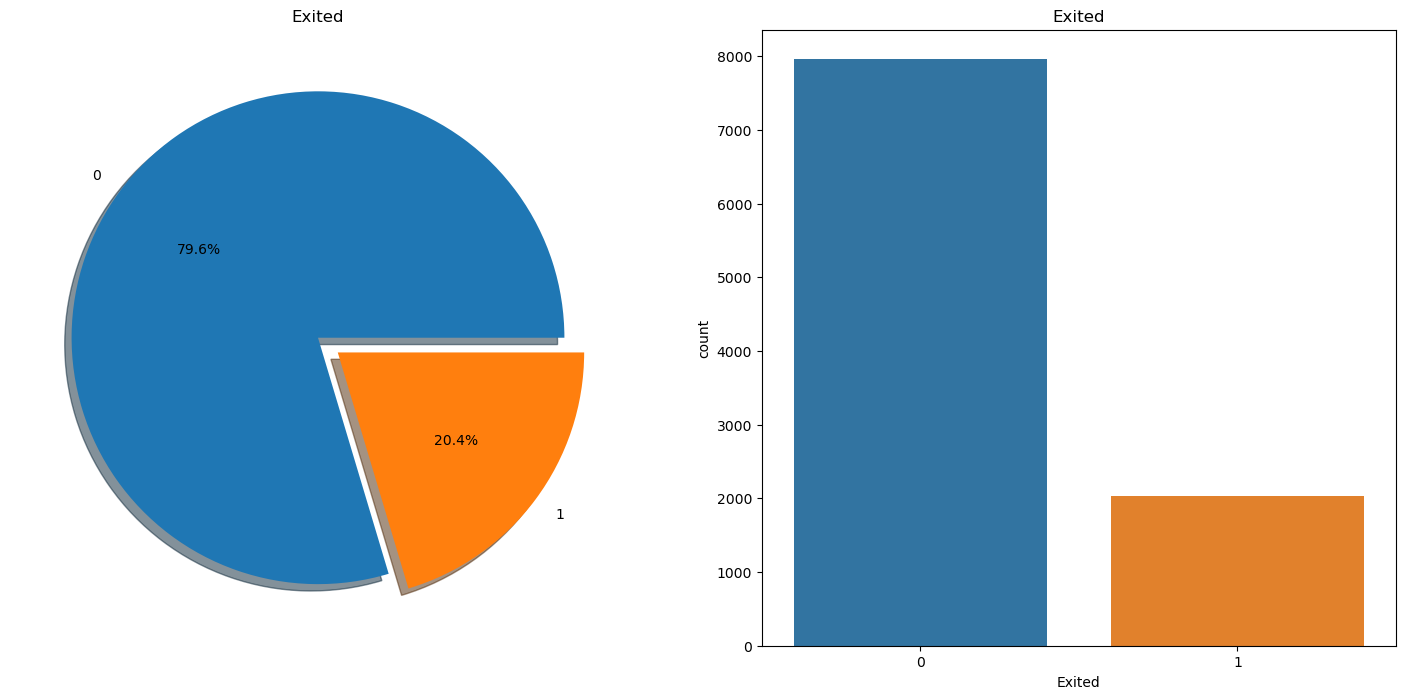

In [13]:
# Make 1 x 2 plot for visualisasi data
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Plotting pie chart for 'Exited' column
df['Exited'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Exited')
ax[0].set_ylabel('')

# Plotting countplot for 'Exited' column
sns.countplot(x='Exited', data=df, ax=ax[1])
ax[1].set_title('Exited')

plt.show()  # Display the figure

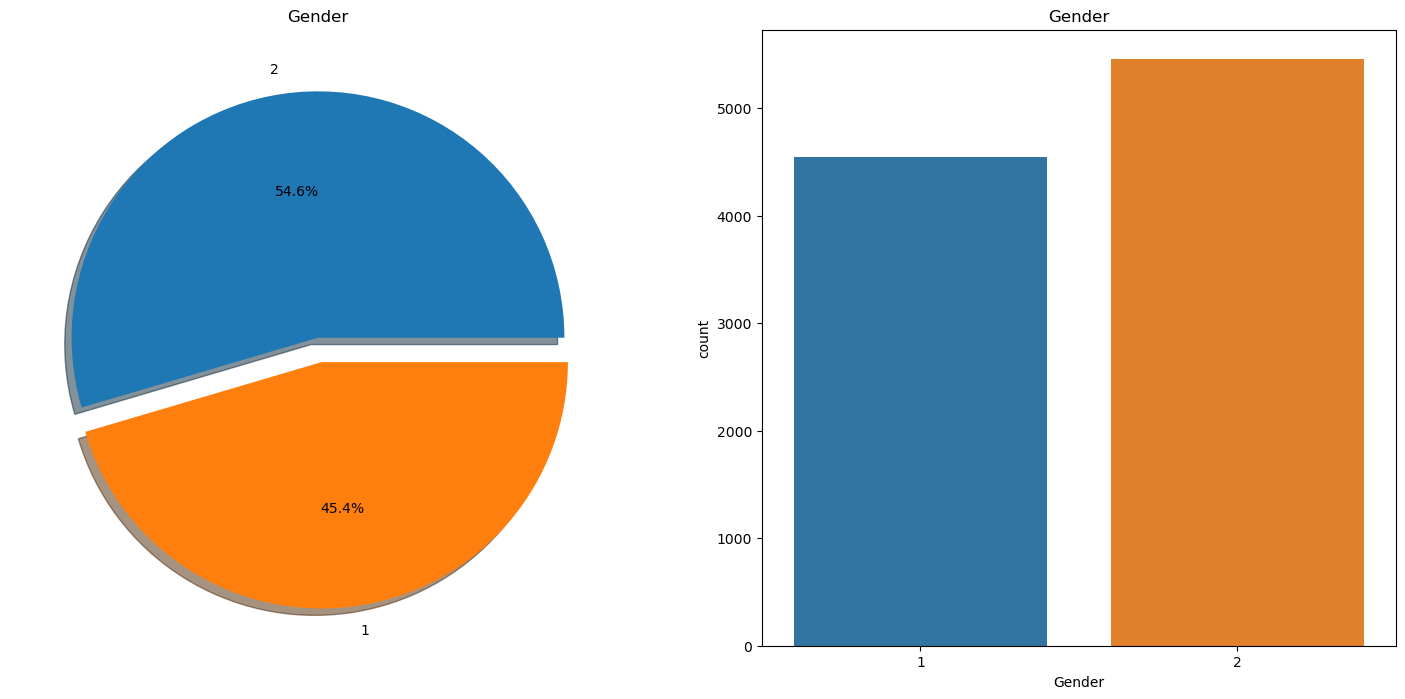

In [14]:
# Make 1 x 2 plot for visualisasi data
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Plotting pie chart for 'Gender' column
df['Gender'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Gender')
ax[0].set_ylabel('')

# Plotting countplot for 'Gender' column
sns.countplot(x='Gender', data=df, ax=ax[1])
ax[1].set_title('Gender')

plt.show()  # Display the figure


In [15]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    total = len(feature) 
    for p in plot.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage

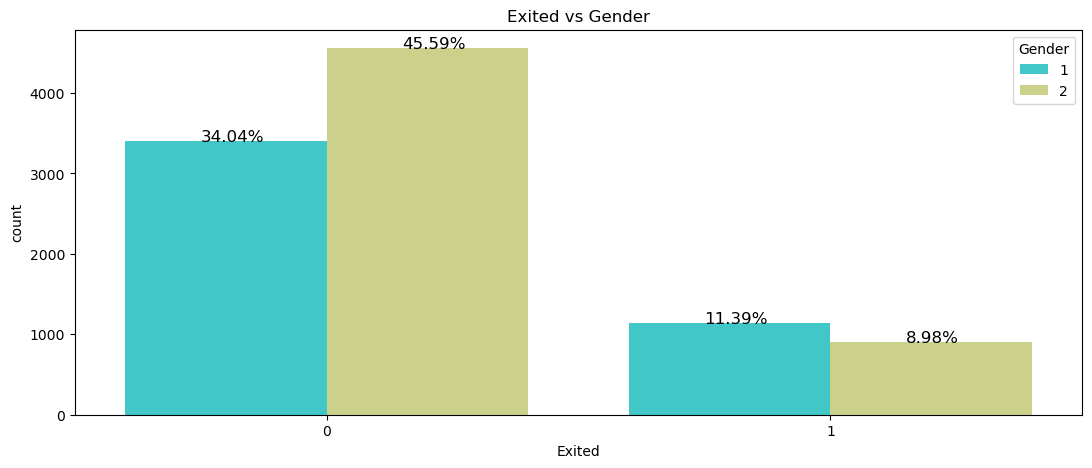

In [16]:
plt.figure(figsize=(13,5))
ax=sns.countplot(x='Exited',hue='Gender',data=df,palette='rainbow')
bar_perc(ax,df['Exited'])
ax.set(title="Exited vs Gender")
plt.show()

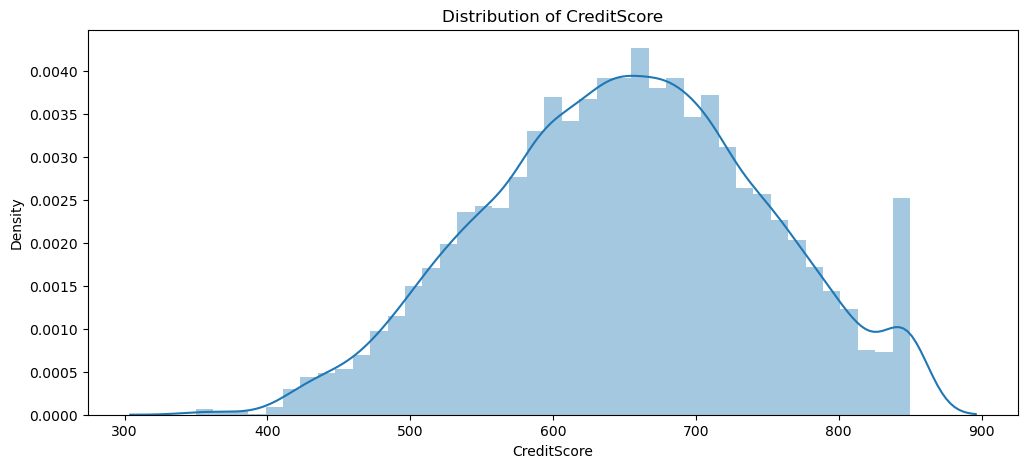

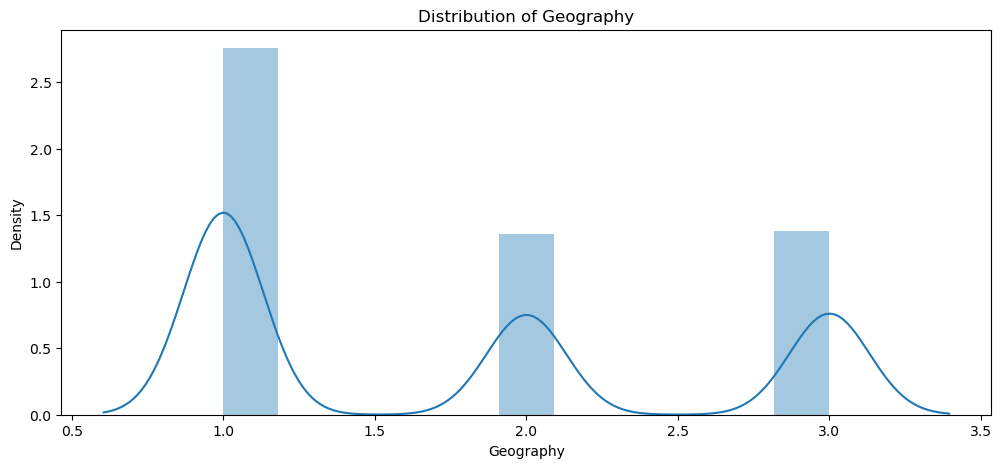

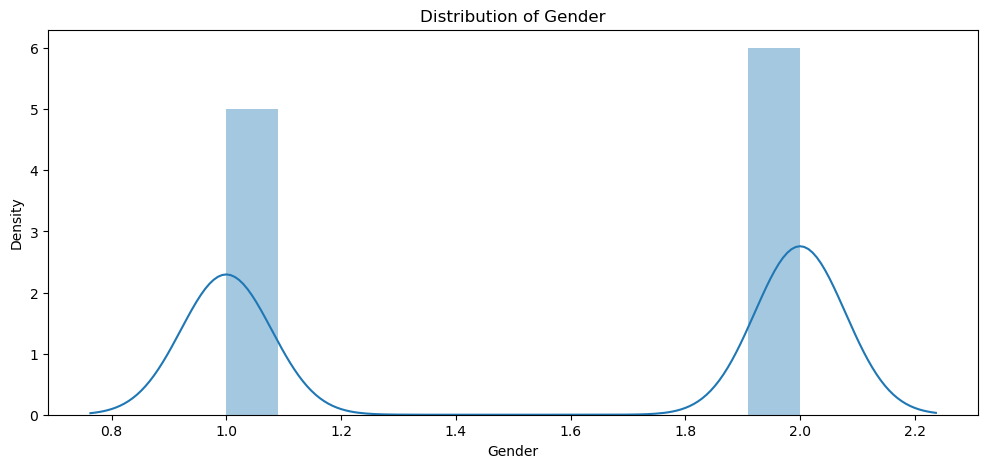

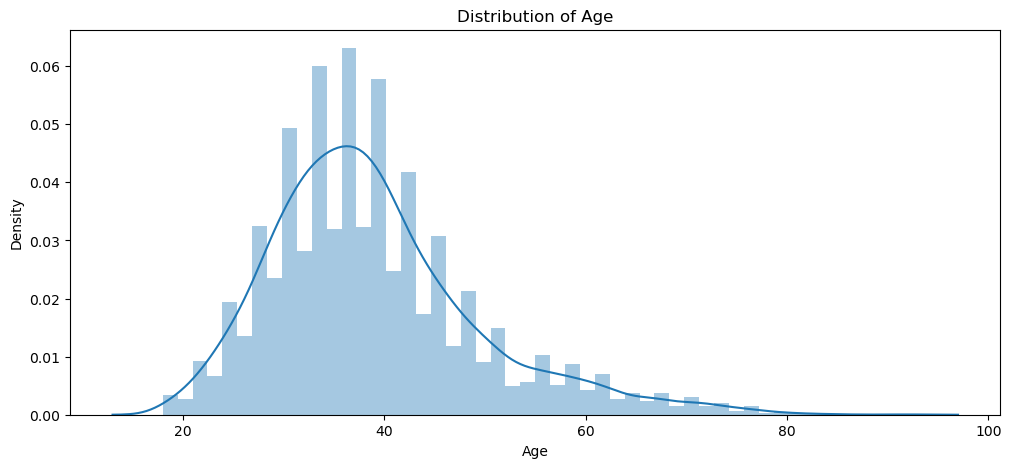

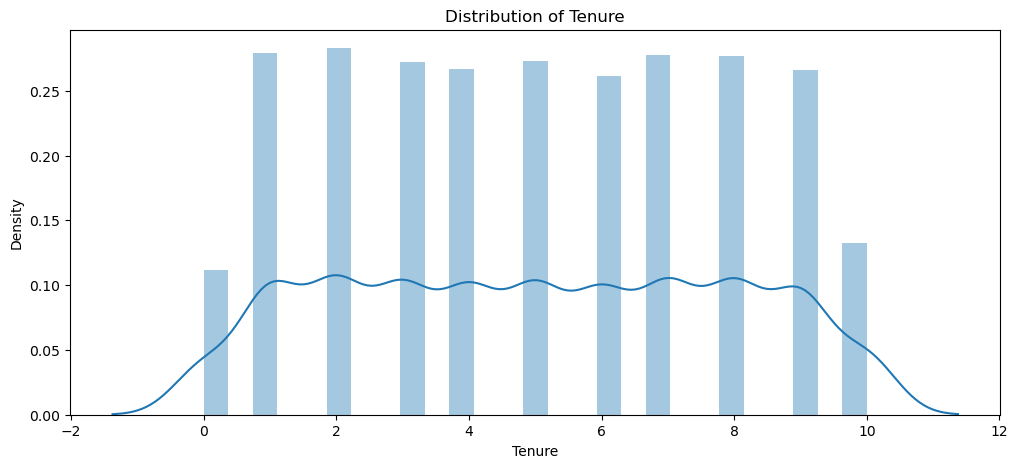

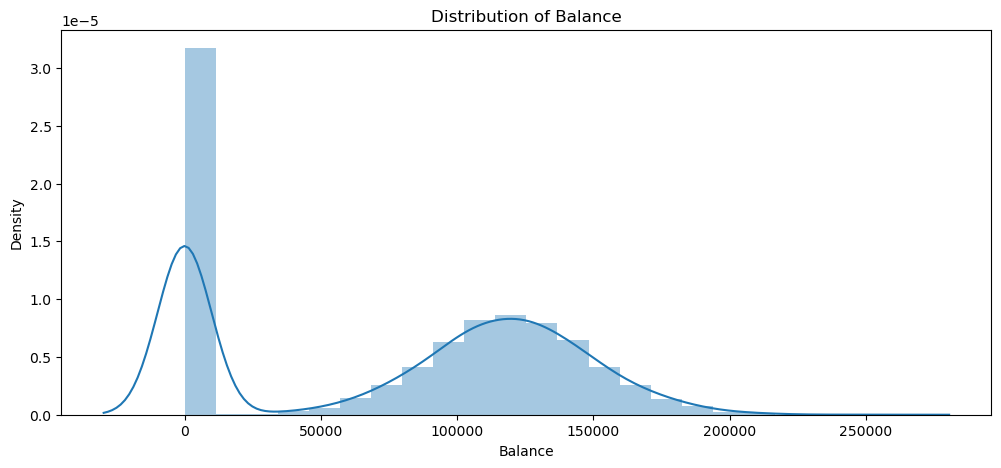

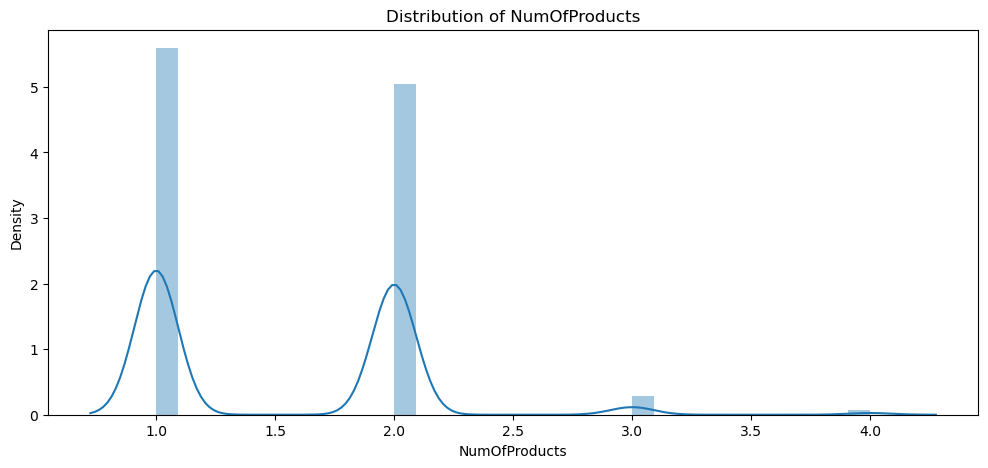

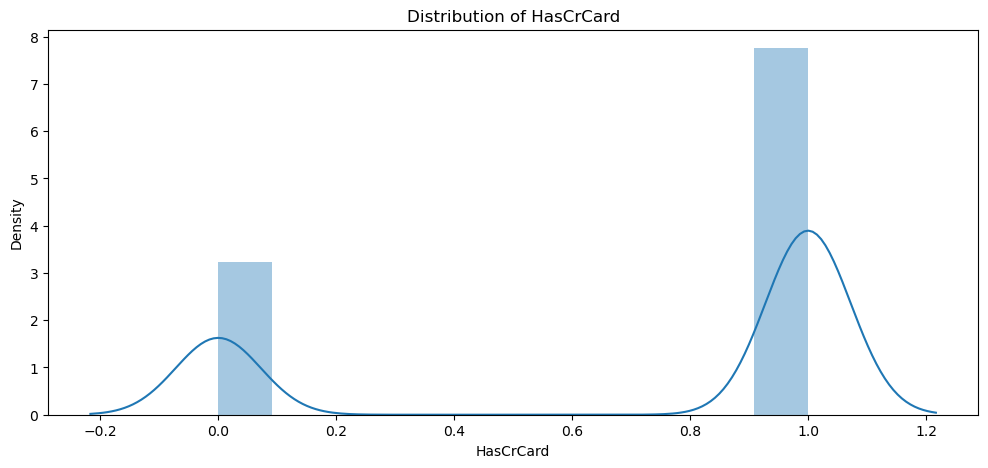

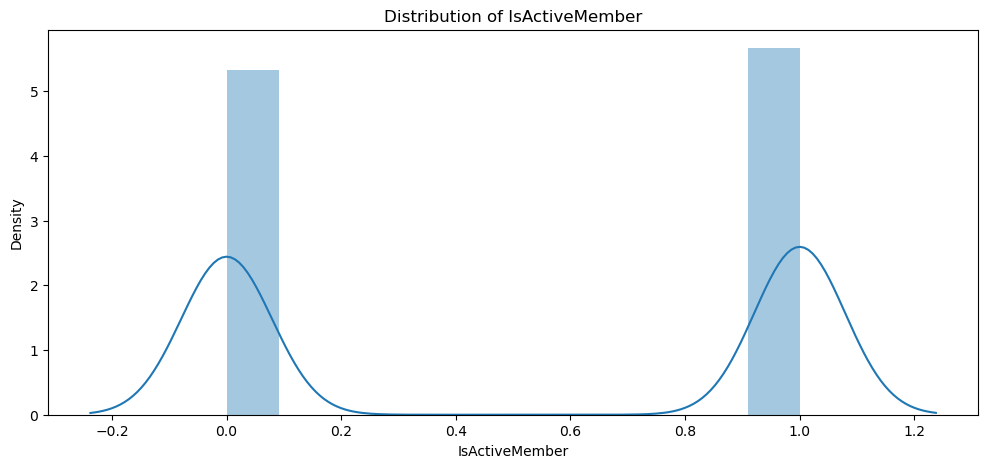

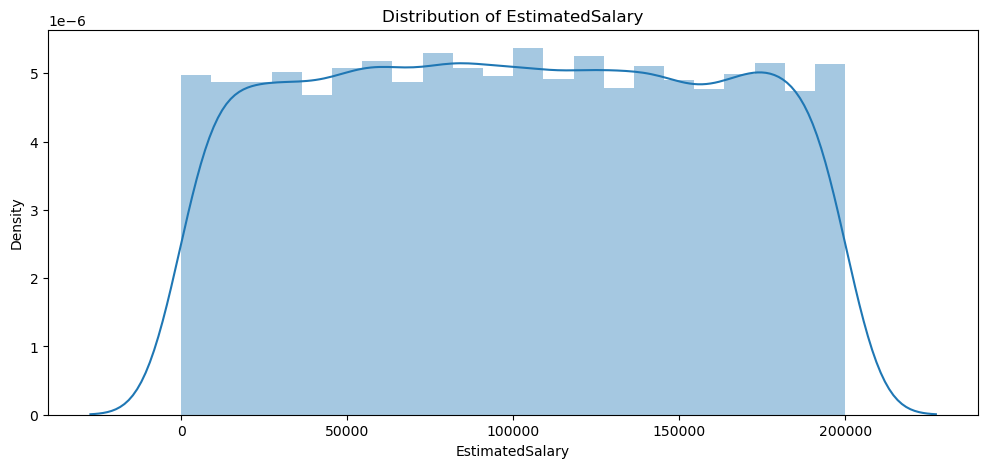

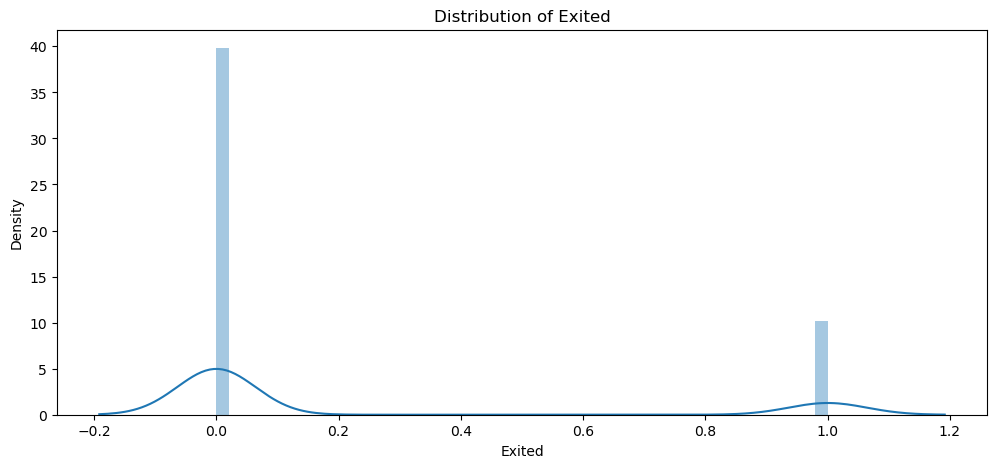

In [17]:
# Make a distplot for every columns in df
for col in df.columns:
    plt.figure(figsize=(12,5))
    plt.title(f"Distribution of {col}")
    sns.distplot(df[col])
    plt.show()

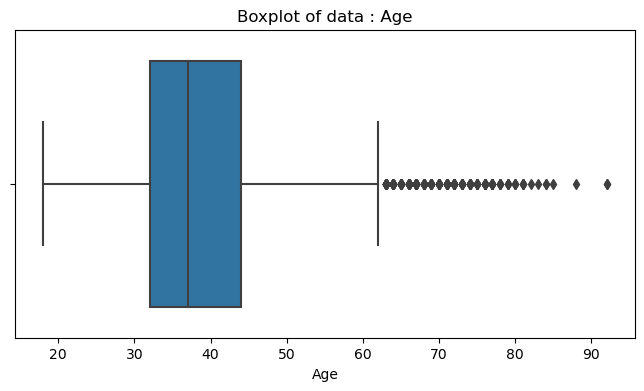

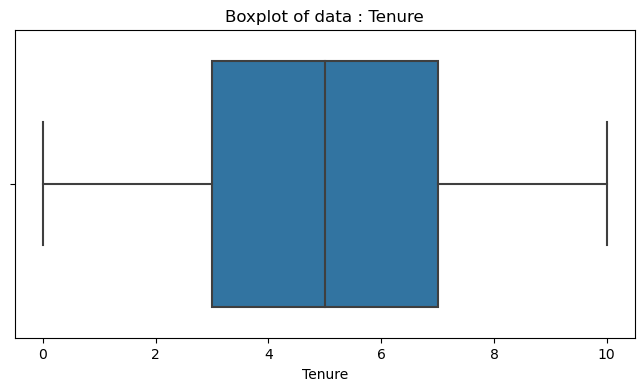

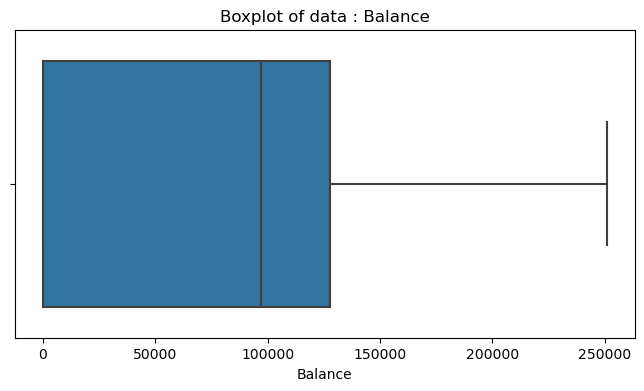

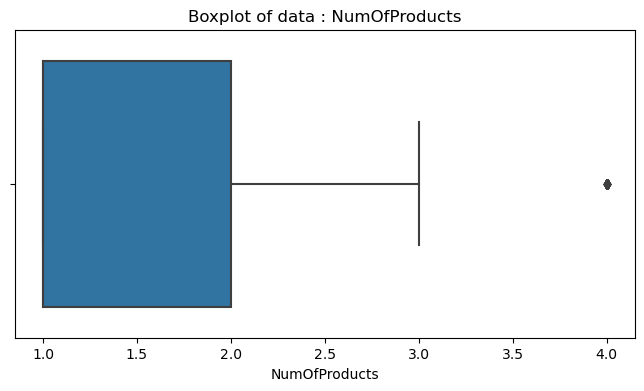

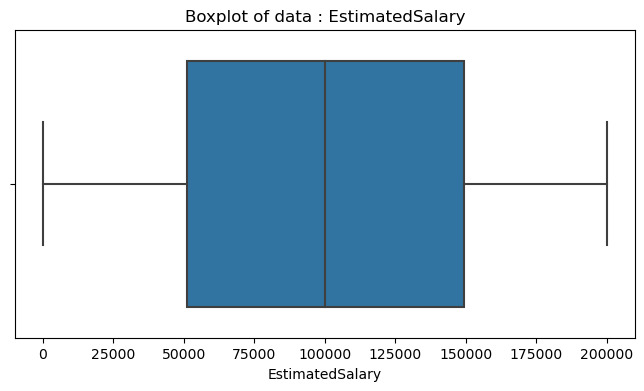

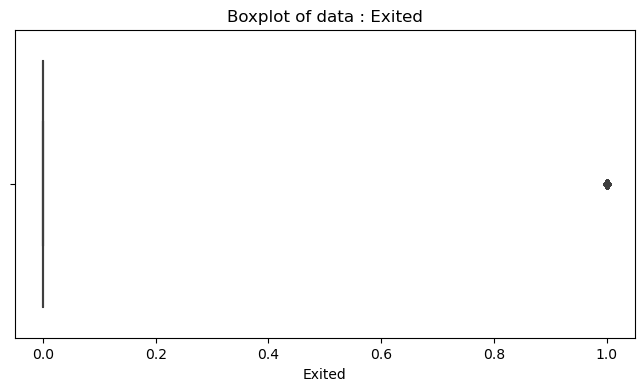

In [18]:
number = df.select_dtypes(include = 'number').drop(['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'], axis = 1)

# Make a Boxplot for every columns, except the drop column
for col in list(number)[1:]:
    plt.figure(figsize = (8,4))
    plt.title(f'Boxplot of data : {col}')
    sns.boxplot(data = df, x = col)

In [19]:
X = df.drop(['Exited'], axis=1)  # Create feature matrix X by dropping the 'Exited' column from the DataFrame df
y = df.loc[:, 'Exited']  # Create target variable y by selecting the 'Exited' column from the DataFrame df

# Split data from data train and data test with portion 80% for train, 20% for test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, train_size = 0.8)

In [20]:
# Create an instance of LazyClassifier with specified parameters
Model_LF = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit the LazyClassifier on the training data and evaluate on the testing data
Model_LF, prediction = Model_LF.fit(X_train, X_test, y_train, y_test)

# Print the model summary and performance metrics
print(Model_LF)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:14<00:00,  1.99it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.87               0.73     0.73      0.86   
XGBClassifier                      0.86               0.72     0.72      0.85   
RandomForestClassifier             0.86               0.72     0.72      0.85   
AdaBoostClassifier                 0.86               0.72     0.72      0.85   
ExtraTreesClassifier               0.87               0.72     0.72      0.85   
BaggingClassifier                  0.85               0.71     0.71      0.84   
NearestCentroid                    0.71               0.70     0.70      0.73   
LabelSpreading                     0.80               0.68     0.68      0.80   
LabelPropagation                   0.80               0.68     0.68      0.80   
DecisionTreeClassifier             0.78               0.67     0.67      0.79   
SVC                         

In [21]:
# Create an instance of LGBMClassifier
Model_LGBM = LGBMClassifier()

# Fit the LGBMClassifier on the training data
Model_LGBM.fit(X_train, y_train)

LGBMClassifier()

In [22]:
# Make predictions on the test data using the trained LGBMClassifier model
y_predict = Model_LGBM.predict(X_test)

In [23]:
# Calculate the accuracy of the model predictions
accuracy = accuracy_score(y_predict, y_test)

# Print the accuracy
print(f'The accuracy of the model is {accuracy}')

The accuracy of the model is 0.867


In [24]:
# Make predictions on the entire dataset using the trained LGBMClassifier model
Prediction = Model_LGBM.predict(df.iloc[:, :].drop(['Exited'], axis=1))

# Print the predictions
print(Prediction)

[0 0 1 ... 0 0 0]


In [25]:
# Assign the predictions to a new column in the DataFrame
df['Exited_predict'] = Prediction

In [26]:
# Display the 'Exited' and 'Exited_predict' columns for the first 20 rows of the DataFrame
df.head(20).loc[:, ['Exited', 'Exited_predict']]

,Exited,Exited_predict
0,1,0
1,0,0
2,1,1
3,0,0
4,0,0
5,1,0
6,0,0
7,1,1
8,0,0
9,0,0


In [27]:
# Create a DataFrame to store the predicted and actual values
df_result = pd.DataFrame({'y_predict': y_predict, 'y_test': y_test})

In [28]:
# Show df_result with for the first 20 data
df_result.head(20)

,y_predict,y_test
6252,0,0
4684,0,0
1731,0,0
4742,0,0
4521,0,0
6340,0,0
576,0,0
5202,0,1
6363,0,0
439,0,0
